In [38]:
from sqlalchemy import create_engine, select, func, desc, text, label
from gorillatracker.ssl_pipeline.models import TrackingFrameFeature, Tracking, Video, Camera
from sqlalchemy.orm import sessionmaker

from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import pandas as pd
import numpy as np

engine = create_engine("sqlite:///test.db")
session_cls = sessionmaker(bind=engine)

stmt = (
    select(Video.camera_id, func.sum(Video.frames).label("count"))
    .group_by(Video.camera_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    sorted_all = sorted(result.fetchall(), key=lambda x: x[1], reverse=True)
    print(tabulate(sorted_all, headers=result.keys(), tablefmt="psql"))

+-------------+---------+
|   camera_id |   count |
|-------------+---------|
|           6 |   19140 |
|          11 |   11520 |
|          36 |   10890 |
|           8 |    9930 |
|           4 |    8340 |
|          25 |    4170 |
|          21 |    4050 |
|          12 |    3870 |
|           3 |    3810 |
|          29 |    3810 |
|          31 |    3690 |
|          14 |    3630 |
|          30 |    3030 |
+-------------+---------+


In [36]:
stmt = select(Video)

with session_cls() as session:
    result = session.execute(stmt)
    print(tabulate(result.fetchall(), headers=result.keys(), tablefmt="psql"))

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Video                                                                                                                                                                 |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| video(id=1, version=2024-04-09, path=/workspaces/gorillatracker/video_data/R501_20220324_130.mp4, camera_id=30, start_time=2022-03-24 06:27:00, fps=60, frames=1215)  |
| video(id=2, version=2024-04-09, path=/workspaces/gorillatracker/video_data/R020_20221114_048.mp4, camera_id=6, start_time=2022-11-14 14:56:00, fps=60, frames=1815)   |
| video(id=3, version=2024-04-09, path=/workspaces/gorillatracker/video_data/R014_20230120_198.mp4, camera_id=3, start_time=2023-01-20 14:08:00, fps=6

+------------+---------+
|   video_id |   count |
|------------+---------|
|         34 |   13915 |
|         40 |    5649 |
|         27 |    3819 |
|         36 |    3367 |
|         22 |    3285 |
|          7 |    2175 |
|         35 |    2155 |
|         30 |    1848 |
|         28 |    1785 |
|         37 |    1568 |
|         20 |    1547 |
|         23 |    1404 |
|         31 |    1001 |
|         38 |     998 |
|         33 |     926 |
|         18 |     882 |
|         25 |     795 |
|         32 |     745 |
|          2 |     728 |
|         39 |     457 |
|         17 |     442 |
|         16 |     418 |
|         24 |     411 |
|         13 |     399 |
|         14 |     366 |
|         26 |     323 |
|         21 |     257 |
|          8 |     253 |
|         12 |     207 |
|          5 |     171 |
|         29 |     139 |
|         11 |     111 |
|         15 |     108 |
|         19 |     107 |
|          3 |      94 |
|         10 |      42 |
|          4 |      30 |


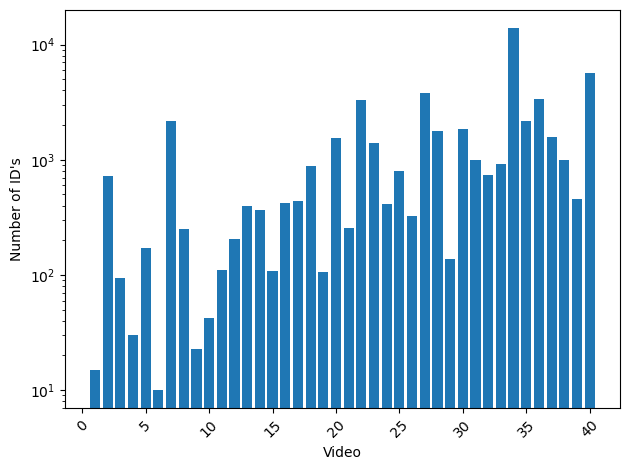

In [39]:
stmt = (
    select(Tracking.video_id, func.sum(Tracking.tracking_id).label("count"))
    .group_by(Tracking.video_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    sorted_all = sorted(result.fetchall(), key=lambda x: x[1], reverse=True)
    print(tabulate(sorted_all, headers=result.keys(), tablefmt="psql"))
    
list1, list2 = zip(*sorted_all)
plt.bar(list1, list2)
plt.yscale("log")
plt.xlabel("Video")
plt.ylabel("Number of ID's")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
with session_cls() as session:
    result = session.execute(select(Tracking))
    all = sorted(result.fetchall(), key=lambda x: x[0].video_id)
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))

+-------------------------------+
| Tracking                      |
|-------------------------------|
| tracking(id=1, video_id=1)    |
| tracking(id=2, video_id=1)    |
| tracking(id=3, video_id=1)    |
| tracking(id=4, video_id=1)    |
| tracking(id=5, video_id=1)    |
| tracking(id=38, video_id=2)   |
| tracking(id=39, video_id=2)   |
| tracking(id=40, video_id=2)   |
| tracking(id=41, video_id=2)   |
| tracking(id=42, video_id=2)   |
| tracking(id=43, video_id=2)   |
| tracking(id=44, video_id=2)   |
| tracking(id=45, video_id=2)   |
| tracking(id=46, video_id=2)   |
| tracking(id=47, video_id=2)   |
| tracking(id=48, video_id=2)   |
| tracking(id=49, video_id=2)   |
| tracking(id=50, video_id=2)   |
| tracking(id=51, video_id=2)   |
| tracking(id=52, video_id=2)   |
| tracking(id=53, video_id=2)   |
| tracking(id=22, video_id=3)   |
| tracking(id=23, video_id=3)   |
| tracking(id=24, video_id=3)   |
| tracking(id=25, video_id=3)   |
| tracking(id=6, video_id=4)    |
| tracking(id=

+-------------+----------+
|   camera_id |    count |
|-------------+----------|
|           3 | 115.231  |
|           4 | 162.083  |
|           6 | 205.426  |
|           8 | 226.444  |
|          11 | 160.854  |
|          12 | 111      |
|          14 |  80.5    |
|          21 | 210.278  |
|          25 | 120.455  |
|          29 | 205.727  |
|          30 |  38.8571 |
|          31 |  85.5385 |
|          36 |  74.0476 |
+-------------+----------+


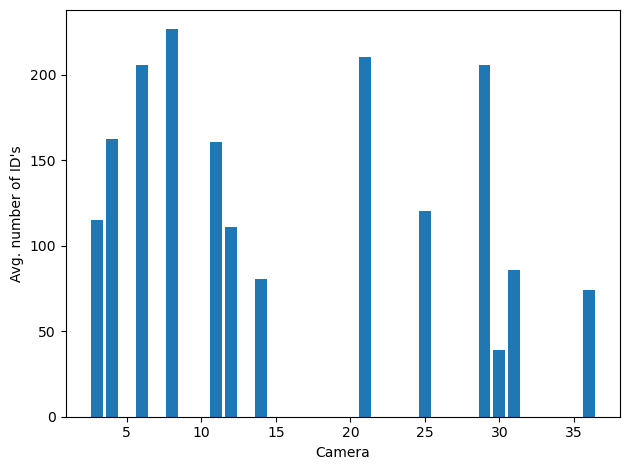

In [46]:
stmt = (
    select(Video.camera_id, func.avg(Tracking.tracking_id).label("count"))
    .join(Tracking, Video.video_id == Tracking.video_id)
    .group_by(Video.camera_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = sorted(result.fetchall(), key=lambda x: x[0])
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))
    
list1, list2 = zip(*all)
plt.bar(list1, list2)
plt.xlabel("Camera")
plt.ylabel("Avg. number of ID's")
plt.tight_layout()
plt.show()

### Datetime

+---------------------+
| start_time          |
|---------------------|
| 2022-03-24 06:27:00 |
| 2022-11-14 14:56:00 |
| 2023-01-20 14:08:00 |
| 2022-06-19 09:12:00 |
| 2022-03-23 09:14:00 |
| 2022-02-28 17:02:00 |
| 2022-03-06 11:59:00 |
| 2022-04-03 10:24:00 |
| 2022-04-28 14:45:00 |
| 2022-09-12 15:56:00 |
| 2022-12-13 15:22:00 |
| 2022-05-29 09:35:00 |
| 2022-12-06 06:52:00 |
| 2022-07-06 09:11:00 |
| 2022-03-30 09:06:00 |
| 2022-10-20 09:26:00 |
| 2022-07-11 13:32:00 |
| 2022-05-20 11:03:00 |
| 2022-07-11 16:04:00 |
| 2022-02-26 11:22:00 |
| 2022-03-26 12:46:00 |
| 2022-11-14 15:19:00 |
| 2023-01-20 14:09:00 |
| 2022-06-19 09:26:00 |
| 2022-04-09 13:51:00 |
| 2022-03-01 06:50:00 |
| 2022-03-06 12:10:00 |
| 2022-04-03 10:48:00 |
| 2022-05-04 14:51:00 |
| 2022-09-25 09:31:00 |
| 2023-01-03 11:32:00 |
| 2022-06-19 09:15:00 |
| 2022-12-23 12:18:00 |
| 2022-07-09 11:22:00 |
| 2022-04-03 13:24:00 |
| 2022-11-11 14:18:00 |
| 2022-07-15 09:13:00 |
| 2022-05-20 11:15:00 |
| 2022-07-11 16:

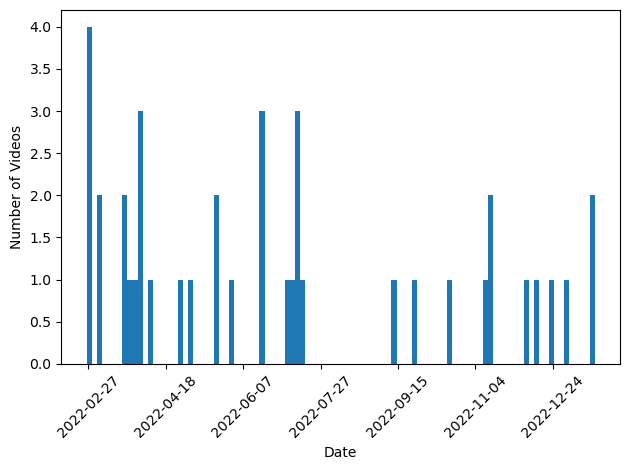

In [55]:
with session_cls() as session:
    result = session.execute(select(Video.start_time))
    all = result.fetchall()
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))
    
all_dates = [mdates.date2num(date[0].date()) for date in all]

fig, ax = plt.subplots()
ax.hist(all_dates, bins=100)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.xlabel("Date")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[(Decimal('20.2500000000'), 1), (Decimal('30.2500000000'), 22), (Decimal('31.2500000000'), 1), (Decimal('32.2500000000'), 1), (Decimal('33.2500000000'), 2), (Decimal('34.2500000000'), 1), (Decimal('37.2500000000'), 1), (Decimal('39.2500000000'), 1), (Decimal('42.2500000000'), 1), (Decimal('45.2500000000'), 1), (Decimal('46.2500000000'), 1), (Decimal('48.2500000000'), 2), (Decimal('49.2500000000'), 1), (Decimal('52.2500000000'), 1), (Decimal('74.2500000000'), 1), (Decimal('77.2500000000'), 1), (Decimal('88.2500000000'), 1)]


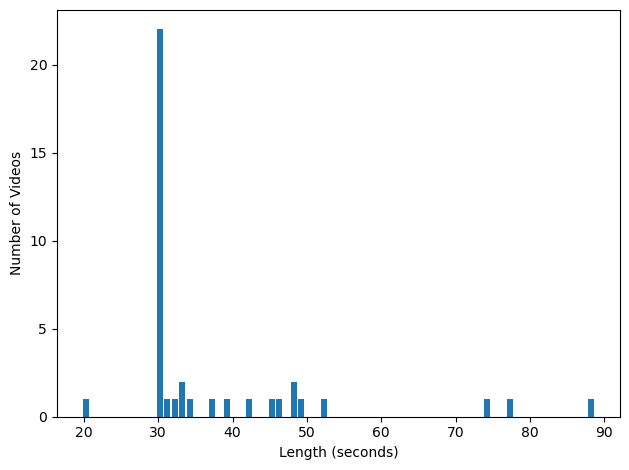

In [63]:
stmt = (
    select((Video.frames / Video.fps).label("duration"), func.count(Video.video_id).label("count"))
    .group_by("duration")
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = result.fetchall()
    print(all)

list1, list2 = zip(*all)
plt.bar(list1, list2)
plt.xlabel("Length (seconds)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()